# 데이터 변환

→ 데이터 형식 구조, 값 등을 변경하여 새로운 형태로 재구성

1. 다양한 기법 데이터 변환
a. 평활화(smoothing) 기법을 사용하여 데이터를 변환

1. 평활화 기법 사용

일일 매출 데이터가 있을 때 데이터의 잡음을 줄이고 전반적인 매출 경향성을 파악

매일 판매량이 있으면, 하루하루 잘 팔리는날 또는 안팔리는 날이 존재

3일치 평균을 내서 

In [1]:
import pandas as pd

# 예제 데이터프레임 생성
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Sales': [200, 220, 250, 230, 240, 260, 280, 300, 320, 340]
}
df = pd.DataFrame(data)

print(df)

        Date  Sales
0 2023-01-01    200
1 2023-01-02    220
2 2023-01-03    250
3 2023-01-04    230
4 2023-01-05    240
5 2023-01-06    260
6 2023-01-07    280
7 2023-01-08    300
8 2023-01-09    320
9 2023-01-10    340


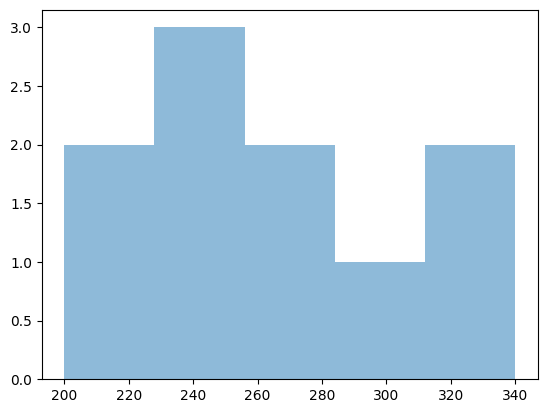

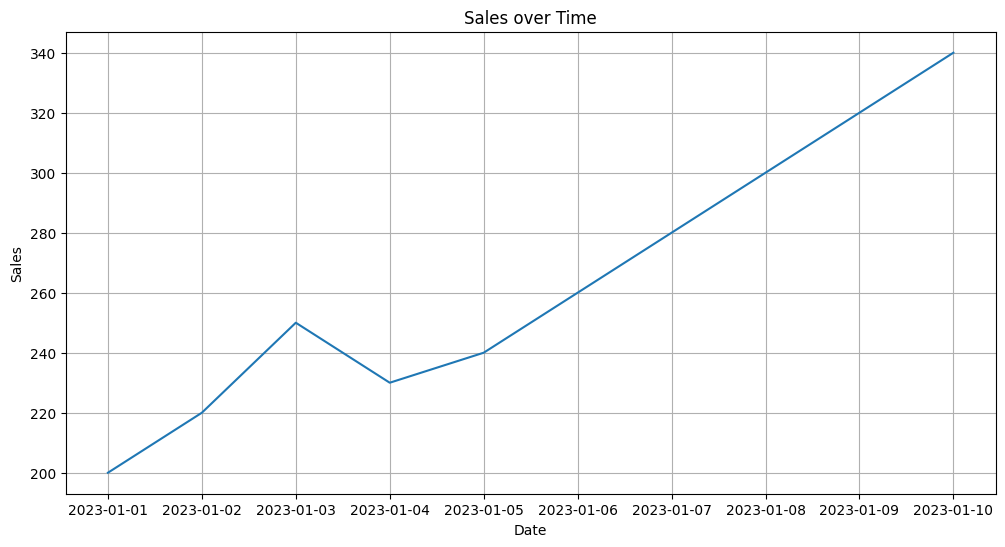

In [4]:
# 그래프 그리기
import matplotlib.pyplot as plt
# 히스토그램 형식으로 일일 판매량 출력
plt.hist(df['Sales'], bins=5, alpha=0.5, label='Daily Sales')

# 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.plot(df['Date'], df['Sales'])
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


In [5]:
# 3월 이동 평균 계산
df['3Days'] = df['Sales'].rolling(window=3).mean()
# window가 의미는 3개 값을 가지고 이동 평균을 계산
# 뒤에 .mean() 평균이라는 뜻
df['3Days']

0           NaN
1           NaN
2    223.333333
3    233.333333
4    240.000000
5    243.333333
6    260.000000
7    280.000000
8    300.000000
9    320.000000
Name: 3Days, dtype: float64

(array([3., 2., 1., 1., 1.]),
 array([223.33333333, 242.66666667, 262.        , 281.33333333,
        300.66666667, 320.        ]),
 <BarContainer object of 5 artists>)

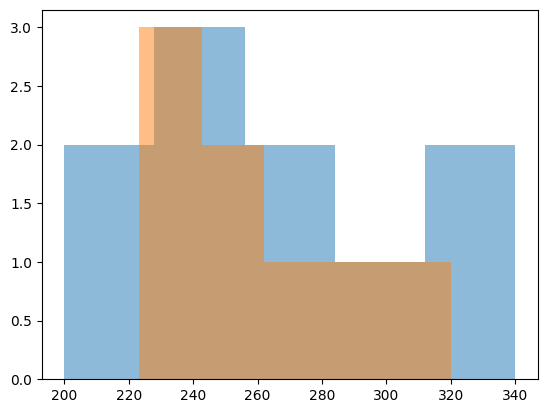

In [7]:
# 그래프 그리기
import matplotlib.pyplot as plt
# 히스토그램 형식으로 일일 판매량 출력
plt.hist(df['Sales'], bins=5, alpha=0.5, label='Daily Sales')
plt.hist(df['3Days'].dropna(), bins=5, alpha=0.5, label='3Days')

b. 일반화 기법 → 명확하지 않게 두루뭉실하게 범주를 나눔, 익명성을 보장함

In [10]:
import pandas as pd

# 예제 데이터프레임 생성
data = {
    'Name': ['John', 'Susan', 'James', 'Sean', 'Tom'],
    'Age': [23, 22, 54, 34, 43],
    'Disease': ['독감', '코로나', '장티푸스', '코로나', '조류독감']
}
df = pd.DataFrame(data)

print(df)

    Name  Age Disease
0   John   23      독감
1  Susan   22     코로나
2  James   54    장티푸스
3   Sean   34     코로나
4    Tom   43    조류독감


In [27]:
# 나이대 변환함수를 정의
# 나이 값이 들어가면 10대, 20대, 30대,~~ 나눠준다

def age_group(age):
    # age = 32, 10으로 나누면 몫은 3이고 나머지 2임
    num = age//10 # 10으로 나눈 몫
    if num < 5:
        return str(num)+'0대'
    else:
        return '50대 이상'
    
def generalize_disease(disease):
    if '코로나' in disease:
        return '코로나'
    elif '독감' in disease:
        return '독감'
    else:
        return '기타'



In [28]:
age_group(30)

'30대'

In [31]:
def age_group(age):
    if age < 20:
        return "10대"
    elif age < 30:
        return "20대"
    elif age < 40:
        return "30대"
    elif age < 50:
        return "40대"
    else:
        return "50대 이상"
    
# .apply 사용

df['Age Group'] = df['Age'].apply(age_group)
df['일반병명'] = df['Disease'].apply(generalize_disease)

df

,Name,Age,Disease,Age Group,일반병명
0,John,23,독감,20대,독감
1,Susan,22,코로나,20대,코로나
2,James,54,장티푸스,50대 이상,기타
3,Sean,34,코로나,30대,코로나
4,Tom,43,조류독감,40대,독감


c. 정규화 기법을 사용하여 데이터 변환

데이터를 특정범위 -1~ +1로 조정하는 데이터 전처리 방법

특성이 각각 매우 다른 단위와 값 범위를 가질 때 사용

In [33]:
import pandas as pd
import numpy as np
# 원본 데이터
data = {
 '집의 크기': [30, 60, 45, 90, 20],
 '방의 개수': [2, 4, 3, 4, 1]
}
df = pd.DataFrame(data)
# 정규화 전 데이터
print(df)

# Min-Max 정규화 함수
def min_max_normalize(df):
 return(df - df.min()) / (df.max() - df.min())
# 정규화
normalized_df = min_max_normalize(df)
# 정규화 후 데이터
print(normalized_df)

   집의 크기  방의 개수
0     30      2
1     60      4
2     45      3
3     90      4
4     20      1
      집의 크기     방의 개수
0  0.142857  0.333333
1  0.571429  1.000000
2  0.357143  0.666667
3  1.000000  1.000000
4  0.000000  0.000000


연습문제

다음 임의의 데이터를 평활화 하세요

window = 5

그래프까지 그리기

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 임의의 데이터 생성 (노이즈가 있는 데이터 예시)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=50, freq='D')  # 50일간의 날짜
values = np.sin(np.linspace(0, 3 * np.pi, 50)) + np.random.normal(scale=0.5, size=50)

# 데이터프레임 생성
df_smoothing = pd.DataFrame(values, columns=['Value'], index=dates)

In [43]:
df_smoothing

df_smoothing['Result'] = df_smoothing['Value'].rolling(window=5).mean()

df_smoothing

,Value,Result
2023-01-01,0.248357,NaN
2023-01-02,0.122026,NaN
2023-01-03,0.699111,NaN
2023-01-04,1.307050,NaN
2023-01-05,0.578606,0.591030
2023-01-06,0.703104,0.681979
2023-01-07,1.704019,0.998378
2023-01-08,1.358645,1.130285
2023-01-09,0.764749,1.021825
2023-01-10,1.258462,1.157796


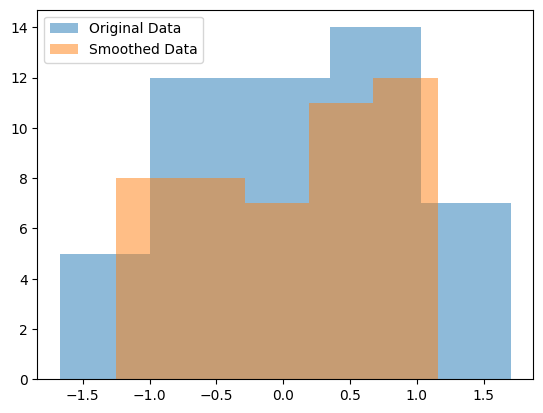

In [45]:
# 그래프 그리기
import matplotlib.pyplot as plt
# 히스토그램 형식으로 일일 판매량 출력
plt.hist(df_smoothing['Value'], bins=5, alpha=0.5, label='Original Data')
plt.hist(df_smoothing['Result'], bins=5, alpha=0.5, label='Smoothed Data')
plt.legend()


### 문제 설명 (일반화)

데이터 프레임 `df`가 있으며, 이 데이터 프레임에는 사람들의 월 소득을 나타내는 `income` 열이 있습니다. 이 `income` 열을 기반으로 사람들을 저소득층, 중산층, 고소득층으로 구분하려고 합니다. 이를 위해 다음과 같은 변환 규칙을 적용합니다:

- 저소득층: 월 소득이 200만 원 이하
- 중산층: 월 소득이 200만 원 초과 500만 원 이하
- 고소득층: 월 소득이 500만 원 초과

### 문제

데이터 프레임 `df`에 새로운 열 `income_group`을 추가하여 소득 그룹을 구분하는 코드를 작성하세요.

In [46]:
import pandas as pd

# 예시 데이터 프레임 생성
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'income': [180, 220, 550, 470]}
df = pd.DataFrame(data)

In [47]:
# income_group 추가하고 열을 담아서 조건 설정
def income_group(income):
    if income <= 200:
        return '저소득층'
    elif 200 < income <= 500:
        return '중산층'
    else:
        return '고소득층'

df['income_group'] = df['income'].apply(income_group)

print(df)

      name  income income_group
0    Alice     180         저소득층
1      Bob     220          중산층
2  Charlie     550         고소득층
3    David     470          중산층


### 문제 설명 (정규화)

### 문제 설명

데이터 프레임 `df`가 있으며, 이 데이터 프레임에는 사람들의 키와 몸무게를 나타내는 `height` 열과 `weight` 열이 있습니다. 이 데이터를 [0, 1] 범위로 정규화하려고 합니다. 이를 위해 Min-Max 정규화를 적용하세요.

In [ ]:
import pandas as pd
import numpy as np
# 원본 데이터
data = {
 '집의 크기': [30, 60, 45, 90, 20],
 '방의 개수': [2, 4, 3, 4, 1]
}
df = pd.DataFrame(data)
# 정규화 전 데이터
print(df)

# Min-Max 정규화 함수
def min_max_normalize(df):
 return(df - df.min()) / (df.max() - df.min())
# 정규화
normalized_df = min_max_normalize(df)
# 정규화 후 데이터
print(normalized_df)

In [59]:
import pandas as pd

# 예시 데이터 프레임 생성
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'height': [160, 175, 180, 165],
        'weight': [55, 78, 70, 60]}
df = pd.DataFrame(data)

print(df)

# Min-Max 정규화 함수
def max_min_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

df['max_min_normalize']=max_min_normalize(df['height'])
df['max_min_normalize']=max_min_normalize(df['weight'])

df


      name  height  weight
0    Alice     160      55
1      Bob     175      78
2  Charlie     180      70
3    David     165      60


,name,height,weight,max_min_normalize
0,Alice,160,55,0.000000
1,Bob,175,78,1.000000
2,Charlie,180,70,0.652174
3,David,165,60,0.217391
